Comparison of sequential vs binary sort

In [29]:
import random
import matplotlib.pyplot as plt
import time

In [2]:
rand_list = random.sample(range(1, 100), 7)
rand_list

[8, 19, 14, 30, 20, 35, 97]

In [3]:
rand_list.sort()
print(rand_list)

[8, 14, 19, 20, 30, 35, 97]


In [4]:
# https://rosettacode.org/wiki/Binary_search#Python
def binary_search_recursive(l, value, low = 0, high = -1):
    if not l: return -1
    if(high == -1): high = len(l)-1
    if low >= high:
        if l[low] == value: return low
        else: return -1
    mid = (low+high)//2
    if l[mid] > value: return binary_search_recursive(l, value, low, mid-1)
    elif l[mid] < value: return binary_search_recursive(l, value, mid+1, high)
    else: return mid

In [10]:
value_to_find = rand_list[3]
value_to_find

In [11]:
print("position of sought value in sorted list is")
binary_search_recursive(rand_list, value_to_find)

position of sought value in sorted list is


3

In [19]:
#https://rosettacode.org/wiki/Binary_search#Python
def binary_search_iterative(l, value):
    low = 0
    high = len(l)-1
    while low <= high: 
        mid = (low+high)//2
#        print(mid)
        if l[mid] > value: high = mid-1
        elif l[mid] < value: low = mid+1
        else: return mid
    return -1

In [20]:
print("position of sought value in sorted list is")
binary_search_iterative(rand_list, value_to_find)

position of sought value in sorted list is


2

In [21]:
rand_list[3]

28

In [22]:
def sequential_search(lst, value):
    for loc,this_entry in enumerate(lst):
        if (this_entry==value): return loc

In [23]:
sequential_search(rand_list, value_to_find)

2

In [83]:
number_of_tests=10
initial_val=10000
list_of_list_lengths=[initial_val,
                      initial_val*10,
                      initial_val*100,
                      initial_val*1000]#,
#                      initial_val*10000]

In [84]:
times_dict={}
for list_len in list_of_list_lengths:
    start_time_iteration=time.time()
    times_from_test = []
    for test_indx in range(number_of_tests):
        rand_list = random.sample(range(1, list_len*10), list_len)
        rand_list.sort()
        value_to_find = random.choice(rand_list)
        start_time_for_search = time.time()
        _=binary_search_iterative(rand_list, value_to_find)
        times_from_test.append(time.time()-start_time_for_search)
    times_dict[list_len] = times_from_test
    print('elapsed time:',time.time()-start_time_iteration)

elapsed time: 0.3209080696105957
elapsed time: 3.346607208251953
elapsed time: 37.31441807746887
elapsed time: 509.7984821796417


In [85]:
ave_results={}
for len_of_list,list_of_times in times_dict.items():
    ave_results[len_of_list]=sum(list_of_times)/len(list_of_times)

In [86]:
ave_results

{10000: 1.4758110046386718e-05,
 100000: 2.067089080810547e-05,
 1000000: 2.4890899658203126e-05,
 10000000: 0.00018677711486816406}

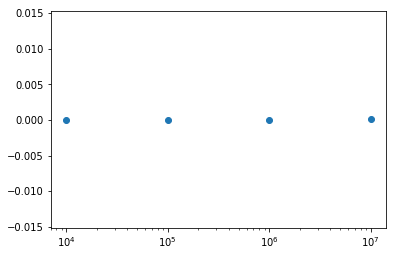

In [87]:
x = ave_results.keys()
y = ave_results.values()
_=plt.scatter(x,y)
ax = plt.gca()
ax.set_xscale('log')

In [88]:
times_dict={}
for list_len in list_of_list_lengths:
    start_time_iteration=time.time()
    times_from_test = []
    for test_indx in range(number_of_tests):
        rand_list = random.sample(range(1, list_len*10), list_len)
        rand_list.sort()
        value_to_find = random.choice(rand_list)
        start_time_for_search = time.time()
        _=sequential_search(rand_list, value_to_find)
        times_from_test.append(time.time()-start_time_for_search)
    times_dict[list_len] = times_from_test
    print('elapsed time:',time.time()-start_time_iteration)

elapsed time: 2.8773677349090576
elapsed time: 3.34854793548584
elapsed time: 36.32530379295349
elapsed time: 466.06178188323975


In [89]:
ave_results={}
for len_of_list,list_of_times in times_dict.items():
    ave_results[len_of_list]=sum(list_of_times)/len(list_of_times)

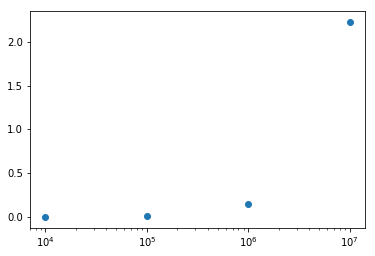

In [90]:
x = ave_results.keys()
y = ave_results.values()
_=plt.scatter(x,y)
ax = plt.gca()
ax.set_xscale('log')

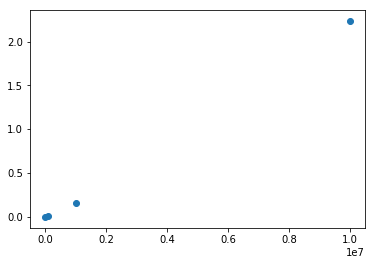

In [91]:
x = ave_results.keys()
y = ave_results.values()
_=plt.scatter(x,y)